In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mplsoccer import Pitch, VerticalPitch, FontManager, Sbopen

In [2]:
### Import class of SofaScore
import sys
sys.path.append('../')
from classes.sofaScore import sofaScore

In [3]:
dataSofa = sofaScore()

In [4]:
## Grab match
url_match = 'https://www.sofascore.com/paraguay-venezuela/xUbsOVb#11518413'
data_match = dataSofa.get_match(url_match)

11518413


In [25]:
### TESTING
data_match['Event']['homeScore'][0]['current'][0]

numpy.int64

## Team Names 

In [26]:
team_names = [data_match['Event']['homeTeam'][0]['name'][0], data_match['Event']['awayTeam'][0]['name'][0]]
team_scores = [data_match['Event']['homeScore'][0]['current'][0], data_match['Event']['awayScore'][0]['current'][0]]

## Plotted Shots

In [10]:
shots = data_match['Shotmap']
shots

,player,shortName,shotType,isHome,bodyPart,xG,minute,addedTime,position,x_start,y_start,x_block,y_block,x_end,y_end,x_goal,y_goal
0,Samuel Sosa,S. Sosa,save,True,left-foot,<NA>,4,<NA>,M,26.8,74.5,46.9,98.1,50.1,100,50.1,4.4
1,Miguel Almirón,M. Almirón,miss,False,left-foot,<NA>,9,<NA>,F,39.8,98.6,51.6,79.5,43.4,100,43.4,2.8
2,Miguel Almirón,M. Almirón,block,False,left-foot,<NA>,12,<NA>,F,51.6,77.4,44.2,94.1,51.9,100,51.9,19.0
3,Salomón Rondón,S. Rondón,block,True,right-foot,<NA>,18,<NA>,F,43.5,93.3,33.9,92.5,49.7,100,49.7,19.0
4,Alexander González,A. González,block,True,right-foot,<NA>,18,<NA>,D,31.6,91.3,56.5,88.5,48.2,100,48.2,19.0
5,Miguel Navarro,M. Navarro,miss,True,left-foot,<NA>,23,<NA>,D,64.1,82.1,51.8,98.8,38.3,100,38.3,1.4
6,Fabián Balbuena,Fabián Balbuena,save,False,head,<NA>,28,<NA>,D,54.8,93.0,50.2,98.8,50.1,100,50.1,15.8
7,Yangel Herrera,Y. Herrera,save,True,head,<NA>,37,<NA>,M,47.0,91.0,56.7,94.3,50.9,100,50.9,25.3
8,Samuel Sosa,S. Sosa,miss,True,left-foot,<NA>,37,<NA>,M,68.7,76.5,47.5,98.8,58.3,100,58.3,1.4
9,Miguel Almirón,M. Almirón,miss,False,left-foot,<NA>,45,2,F,64.3,87.3,61.0,83.7,50.8,100,50.8,66.7


In [68]:
#### Home team
home_shots_miss_goal = shots[shots['isHome'] == True][shots['shotType'] != 'goal']
home_shots_non_goal = home_shots_miss_goal[home_shots_miss_goal['shotType'] != 'miss']
home_shots_goal = shots[shots['isHome'] == True][shots['shotType'] == 'goal']

#### Away team
away_shots_miss_goal = shots[shots['isHome'] != True][shots['shotType'] != 'goal']
away_shots_non_goal = away_shots_miss_goal[away_shots_miss_goal['shotType'] != 'miss']
away_shots_goal = shots[shots['isHome'] != True][shots['shotType'] == 'goal']

copy_shots = home_shots_goal.reset_index(drop=True)

copy_shots

,player,shortName,shotType,isHome,bodyPart,xG,minute,addedTime,position,x_start,y_start,x_block,y_block,x_end,y_end,x_goal,y_goal
0,Salomón Rondón,S. Rondón,goal,True,right-foot,<NA>,90,3,F,50.0,88.5,NaN,NaN,52.6,100,52.6,7.0


Text(0.5, 0.5, 'Venezuela vs. Paraguay\n1-0')

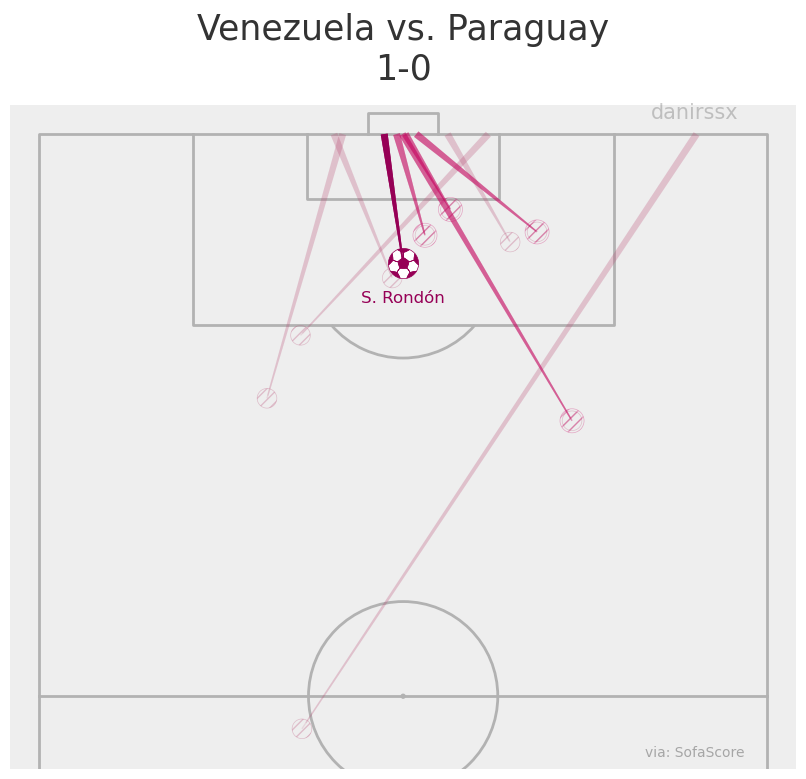

In [79]:
## Styles
plt.style.use('bmh')

## Setup the pitch
pitch = VerticalPitch(half=True, pad_bottom=10, goal_type='box', pitch_type='opta')
fig, axs = pitch.grid(figheight=8, endnote_height=0, title_height=0.1, title_space=0.02, axis=False, grid_height=0.83)

## Setup Missed shots:
shot_plot_miss_goal = pitch.scatter(home_shots_miss_goal['y_start'], home_shots_miss_goal['x_start'], marker='o', s=200, ax=axs['pitch'], label='Shooter', zorder=1.2, c='None', hatch='///', edgecolors='#b94b75', alpha=0.3)
line_miss_goal = pitch.lines(home_shots_miss_goal['y_start'], home_shots_miss_goal['x_start'],  home_shots_miss_goal['y_end'], home_shots_miss_goal['x_end'], comet=True, label='shot', color='#b94b75', ax=axs['pitch'], transparent=True, alpha=0.15)

## Setup Close shots:
shot_plot_non_goal = pitch.scatter(home_shots_non_goal['y_start'], home_shots_non_goal['x_start'], marker='o', s=300, ax=axs['pitch'], label='Shooter', zorder=1.2, c='None', hatch='///', edgecolors='#cb0162', alpha=0.3)
line_non_goal = pitch.lines(home_shots_non_goal['y_start'], home_shots_non_goal['x_start'],  home_shots_non_goal['y_end'], home_shots_non_goal['x_end'], comet=True, label='shot', color='#cb0162', ax=axs['pitch'], transparent=True, alpha=0.3)


### Setup goal:
shot_plot_goal = pitch.scatter(home_shots_goal['y_start'], home_shots_goal['x_start'], marker='football', s=500, ax=axs['pitch'], label='Shooter', zorder=1.2, c='white', edgecolors='#960056')
line_plot_goal = pitch.lines(home_shots_goal['y_start'], home_shots_goal['x_start'],  home_shots_goal['y_end'], home_shots_goal['x_end'], comet=True, label='shot', color='#960056', ax=axs['pitch'])

#### NOTES:
# Goals:
copy_shots = home_shots_goal.reset_index(drop=True)
for i in range(len(copy_shots)):
    pitch.annotate(copy_shots['shortName'][i], (copy_shots['y_start'][i]-3, copy_shots['x_start'][i]), va='center', ha='center', color='#960056', fontsize=12, ax=axs['pitch'])

# Credits
pitch.annotate('danirssx', (102, 10),
                   va='center', ha='center', color='black', alpha=0.2,
                    fontsize=15, ax=axs['pitch'])
pitch.annotate('via: SofaScore', (45, 10),
                   va='center', ha='center', color='black', alpha=0.3,
                    fontsize=10, ax=axs['pitch'])

## Plot title:
axs['title'].text(0.5, 0.5, f'{team_names[0]} vs. {team_names[1]}\n{team_scores[0]}-{team_scores[1]}',
                  va='center', ha='center', color='black', alpha=0.8, fontsize=25)